<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Categorical_to_Numeric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statistics as stat
import scipy.stats as stats

In [3]:
#one way anova is categorical to numeric relationships
df = pd.read_csv("http://ishelp.info/data/insurance.csv")

### Independent Two-Sample *t*-Test (Equal Variances Assumed)

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

$$
s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
$$


In [4]:
stats.ttest_ind(df.charges, df.age)

TtestResult(statistic=np.float64(39.96528853055413), pvalue=np.float64(2.9370265924654854e-274), df=np.float64(2674.0))

In [5]:
#let's get the t_test manually for comprehension first

#fetch xbar 1 and x_bar 2
mean_charges = df.charges.mean()
mean_age = df.age.mean()

#standard deviation for both
std_charges = df.charges.std()
std_age = df.age.std()


#numerator for sp
numerator = ((len(df.charges) - 1) * std_charges**2) + ((len(df.age) - 1) * std_age**2)

#denominator for sp
denominator = len(df.charges) + len(df.age) - 2

#sp
sp = (numerator / denominator)**0.5

In [6]:
#t test manual calculation

t = (mean_charges - mean_age) / (sp * ((1/len(df.charges)) + (1/len(df.age)))**0.5)
t

np.float64(39.96528853055416)

In [7]:
len(df.charges) * 2

2676

In [8]:
group1 = df[df.smoker == 'yes']["charges"]
group2 = df[df.smoker == 'no']["charges"]

stats.ttest_ind(group1, group2, equal_var=False)

TtestResult(statistic=np.float64(32.751887766341824), pvalue=np.float64(5.88946444671698e-103), df=np.float64(311.85112492054634))

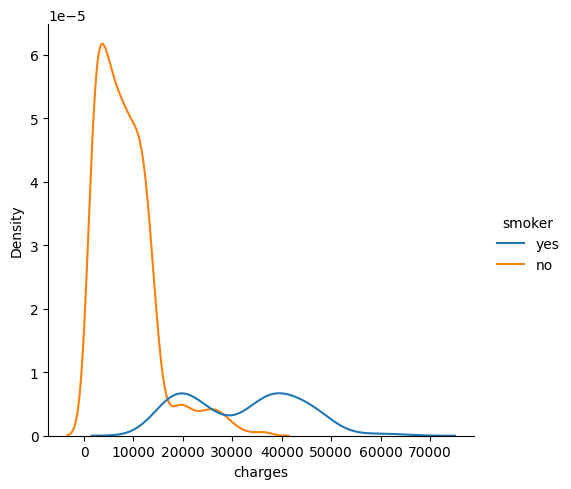

In [9]:
#lets do a dist plot

sns.displot(data=df, x="charges", hue="smoker", kind="kde")

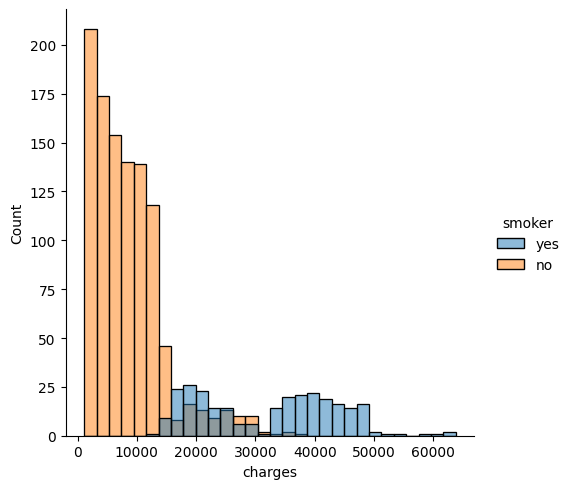

In [10]:
sns.displot(data=df, x="charges", hue="smoker")

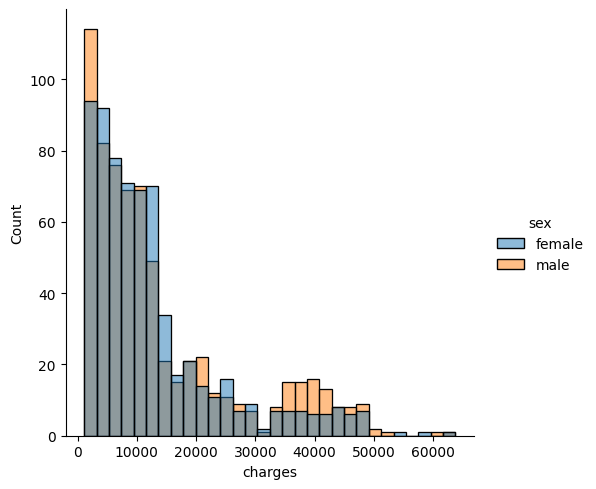

In [11]:
#let's add another distplot for sex
sns.displot(data=df, x="charges", hue="sex")

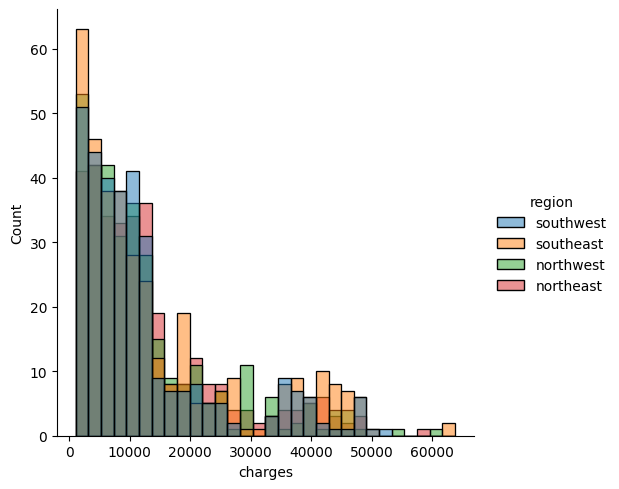

In [12]:
#let's add another distplot for regions
sns.displot(data=df, x="charges", hue="region")

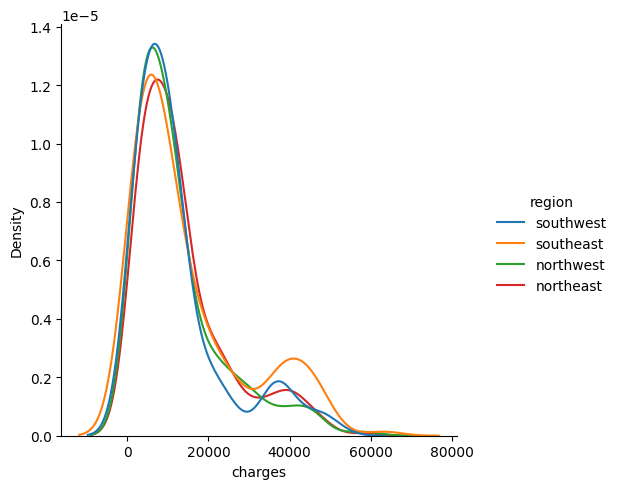

In [13]:
sns.displot(data=df, x="charges", hue="region", kind='kde')

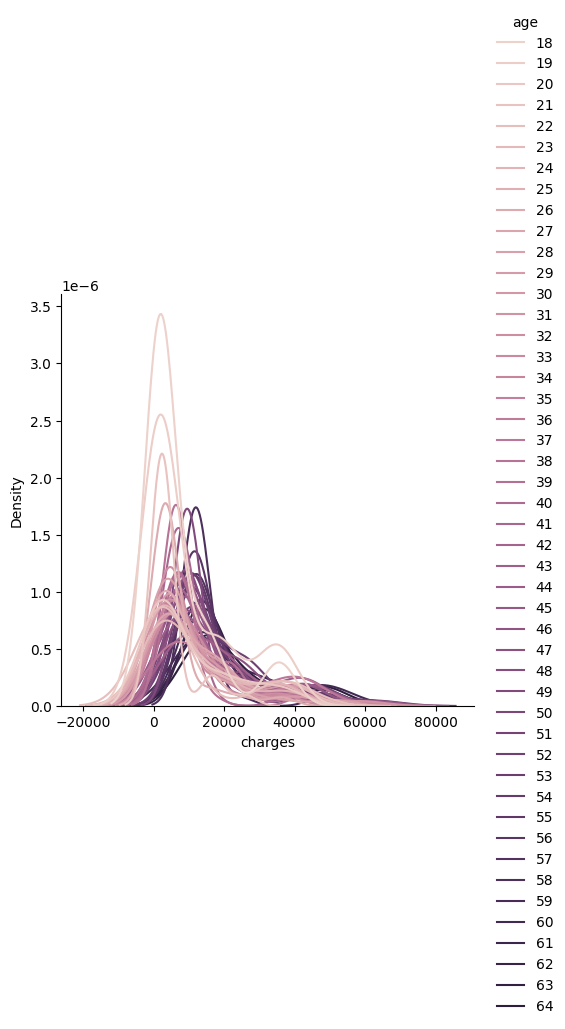

In [14]:
#Plotting the age differences for a bunch of stuff

sns.displot(data=df, x='charges', hue='age', kind='kde')

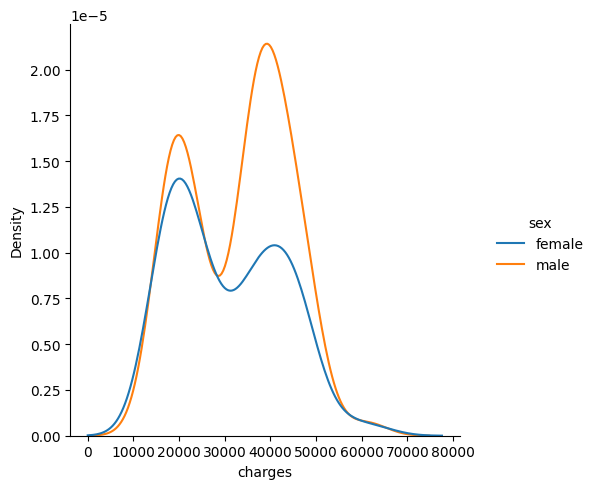

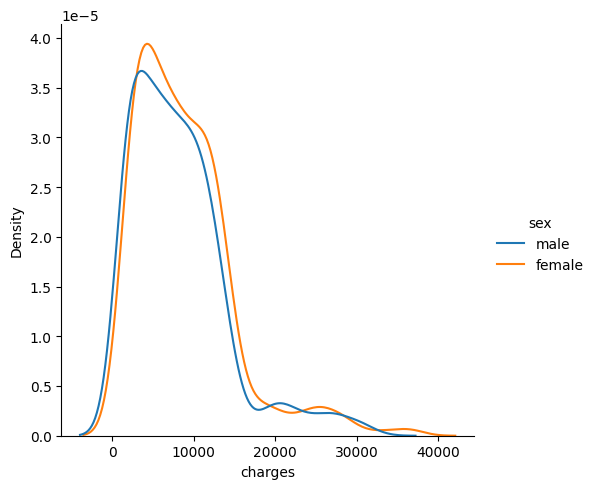

In [15]:
group1 = df[df.smoker == 'yes']
group2 = df[df.smoker == 'no']


sns.displot(data=group1, x='charges', hue='sex', kind='kde')
sns.displot(data=group2, x='charges', hue='sex', kind='kde')



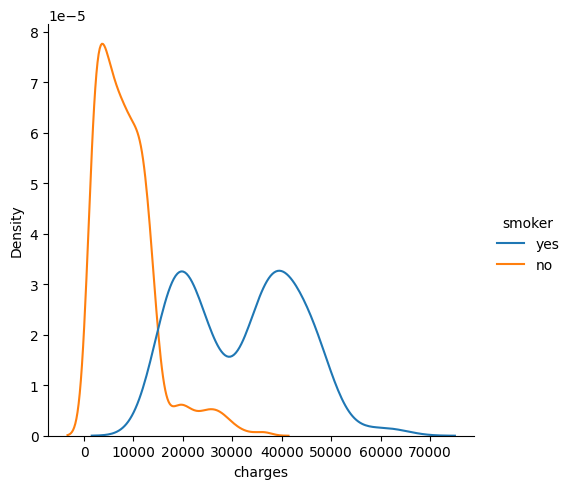

In [16]:
sns.displot(data=df, x='charges', hue='smoker', kind='kde', common_norm=False)


<Axes: xlabel='charges', ylabel='Density'>

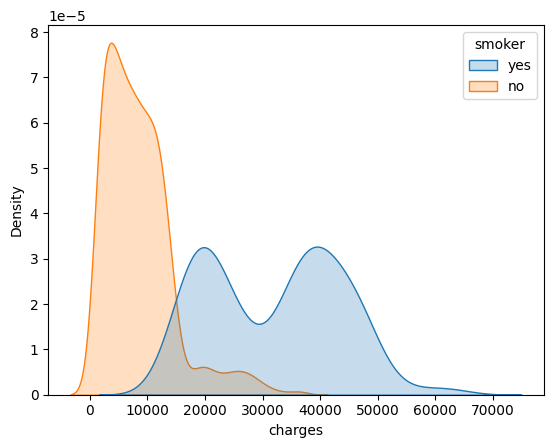

In [17]:
sns.kdeplot(data=df, x='charges', hue='smoker', common_norm=False, fill=True)


/tmp/ipython-input-1559768313.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


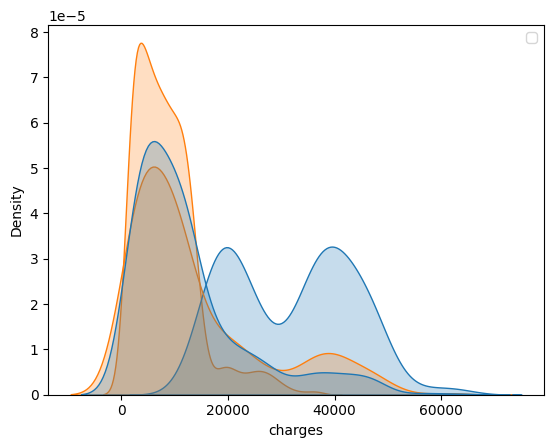

In [18]:
sns.kdeplot(data=df, x='charges', hue='smoker', common_norm=False, fill=True)
sns.kdeplot(data=df, x='charges', hue='sex', common_norm=False, fill=True)
plt.legend()


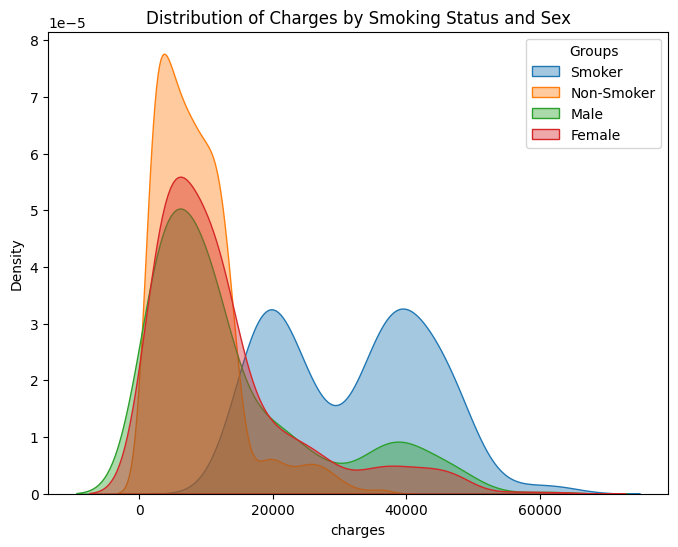

In [19]:
plt.figure(figsize=(8,6))

sns.kdeplot(data=df[df.smoker == 'yes'], x='charges', fill=True, alpha=0.4, label='Smoker')
sns.kdeplot(data=df[df.smoker == 'no'], x='charges', fill=True, alpha=0.4, label='Non-Smoker')
sns.kdeplot(data=df[df.sex == 'male'], x='charges', fill=True, alpha=0.4, label='Male')
sns.kdeplot(data=df[df.sex == 'female'], x='charges', fill=True, alpha=0.4, label='Female')

plt.legend(title='Groups', loc='upper right')
plt.title("Distribution of Charges by Smoking Status and Sex")
plt.show()


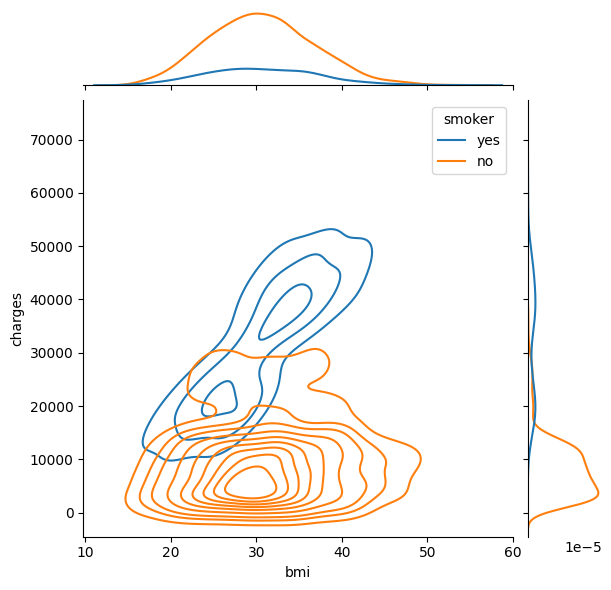

In [20]:
sns.jointplot(data=df, x='bmi', y='charges', kind='kde', hue='smoker')


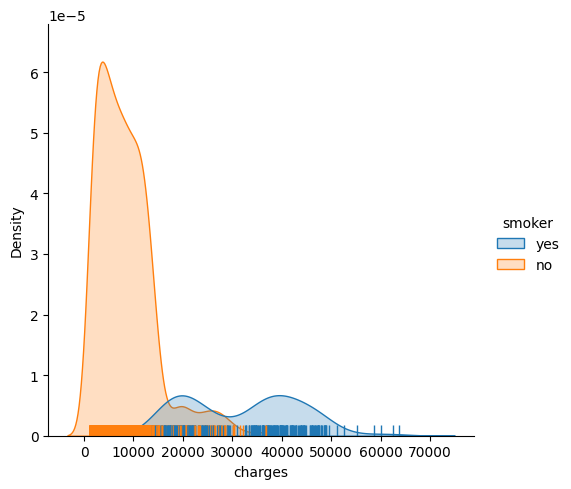

In [21]:
sns.displot(data=df, x='charges', hue='smoker', kind='kde', fill=True, rug=True)


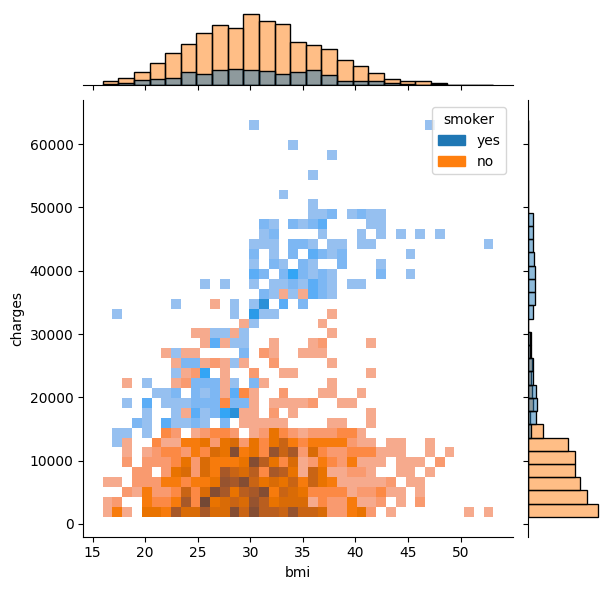

In [22]:
sns.jointplot(data=df, x='bmi', y='charges', hue='smoker', kind='hist', bins=40)


In [23]:
group_yes = df[df.smoker == 'yes']['charges']
group_no = df[df.smoker == 'no']['charges']

stats.f_oneway(group_yes, group_no)

F_onewayResult(statistic=np.float64(2177.614868056517), pvalue=np.float64(8.271435842185788e-283))

In [24]:
from scipy import stats
from scipy.stats import f

group_yes = df[df.smoker == 'yes']['charges']
group_no  = df[df.smoker == 'no']['charges']

# observed
res = stats.f_oneway(group_yes, group_no)
F_obs = res.statistic      # 2177.614868056517
pval = res.pvalue

# degrees of freedom for two groups:
k = 2
n1 = len(group_yes)
n2 = len(group_no)
df1 = k - 1               # numerator df = 1
df2 = n1 + n2 - k         # denominator df = N - k

alpha = 0.05
F_critical = f.ppf(1 - alpha, df1, df2)

print("F observed:", F_obs)
print("df1, df2:", df1, df2)
print("F critical (alpha=0.05):", F_critical)
print("p-value:", pval)


F observed: 2177.614868056517
df1, df2: 1 1336
F critical (alpha=0.05): 3.848428610539575
p-value: 8.271435842185788e-283


In [25]:
#data wrangling


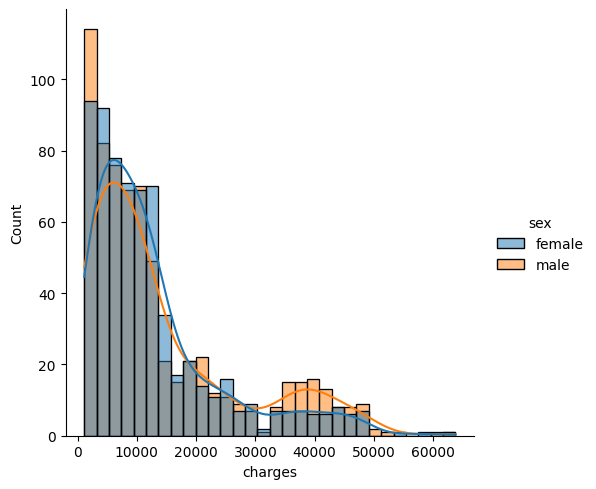

In [31]:
#this is a unique way to add both the kde and distplot in the same context

sns.displot(data=df, x="charges", hue="sex", kde=True)

In [ ]:
display(df.groupby('smoker')['charges'].describe())

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

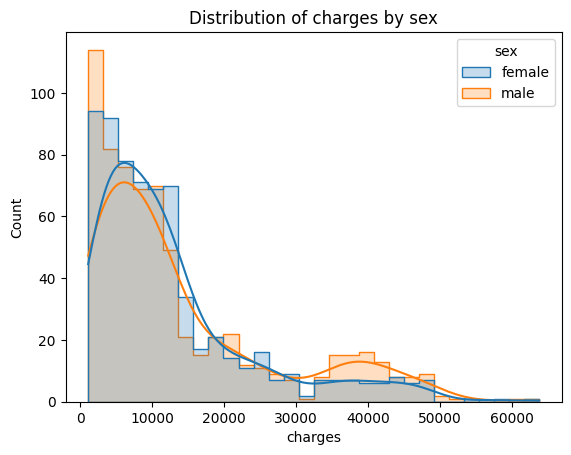



----------------------------------------------------------------------------




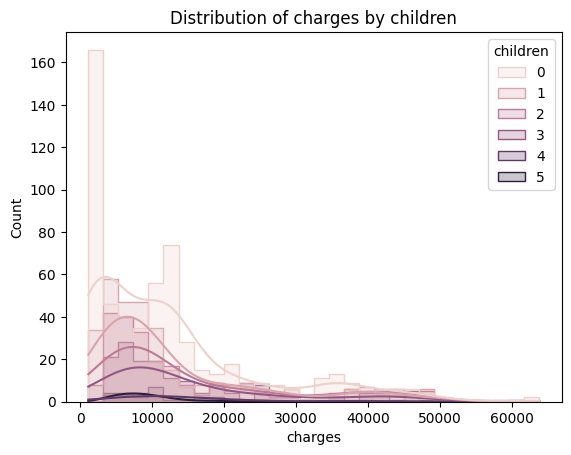



----------------------------------------------------------------------------




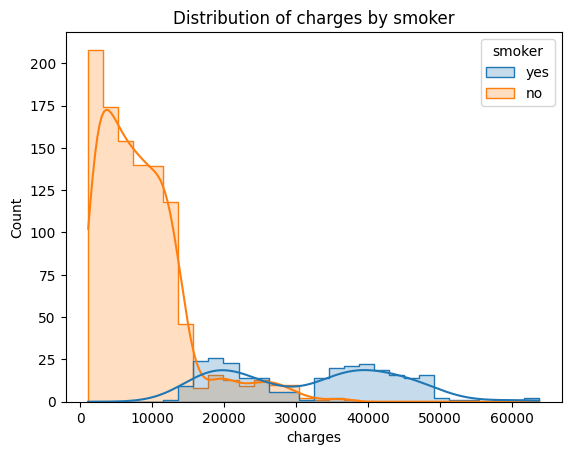



----------------------------------------------------------------------------




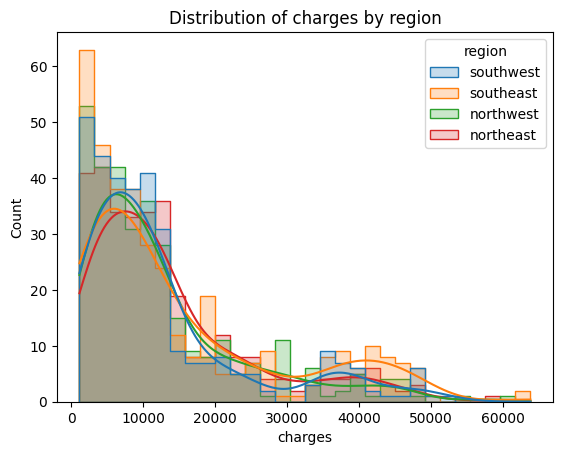



----------------------------------------------------------------------------




In [41]:
columns = [i for i in df.columns if i != 'charges']
for col in columns:
    if df[col].dtype == 'object' or df[col].nunique() < 10:  # categorical check
        sns.histplot(data=df, x="charges", hue=col, kde=True, element="step")
        plt.title(f"Distribution of charges by {col}")
        plt.show()
        print()
        print()
        print('----------------------------------------------------------------------------')
        print()
        print()